## Bank Telemarketing Campaign Case Study.

#In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

In [5]:
# import the necessary Libraries

import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 


There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


In [10]:
# read the dataset

data=pd.read_csv('bank_marketing_updated_v1.csv')
data.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


In [11]:
# don't want top 2 rows skip them

data=pd.read_csv('bank_marketing_updated_v1.csv',skiprows=2)
data.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [12]:
# To see how many rows and columns are present in the dataset

data.shape

(45211, 19)

### Droping customer id

In [14]:
# Droping the customerid column from the table 

data.drop("customerid", axis=1,inplace=True)
data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [15]:
# Create new column Job and inserted the jobedu seperate in job

data['Job']=data['jobedu'].apply(lambda x:x.split(',')[0])
data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [16]:
# create a new column education and inserted the jobedu seperated in education

data['education']=data['jobedu'].apply(lambda x:x.split(',')[1])
data.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [17]:
# Drop the jobedu column

data.drop('jobedu',axis=1,inplace=True)
data.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Extract the month from the column month

In [19]:
data[data['month'].apply(lambda x:isinstance(x,float))==True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


In [20]:
# check the missing values in the dataset

data.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
Job           0
education     0
dtype: int64

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


### handling missing values in age column.

In [24]:
# check for missing values in the age column

data.age.isnull().sum()

20

In [25]:
# calculate the percentage of missing values in age column

float(100*20/45211)

0.04423702196368141

In [26]:
# Deleted rows which having missing values int age column

data1=data[-data.age.isnull()].copy()
data1.shape

(45191, 19)

#### handling missing values in month column

In [28]:
# count of missing values in the month column

data1.month.isnull().sum()

50

In [29]:
# check for total percentage of missing values in the month column

float(100*50/45191)

0.11064149941360005

In [30]:
# frequence counts of the month columns

data1.month.value_counts(normalize=True)

month
may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: proportion, dtype: float64

In [31]:
# Find the mode of month in data1

month_mode=data1.month.mode()[0]
month_mode

'may, 2017'

In [32]:
# fill the missing values with mode values in the month column

data1.month.fillna(month_mode, inplace=True)
data1.month.value_counts(normalize=True)

month
may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: proportion, dtype: float64

In [33]:
# check the missing values in the month column

data1.month.isnull().sum()

0

### handling missing values in response column 

In [35]:
# checking null values in the response column

data1.response.isnull().sum()

30

In [36]:
# total percentage of missing values in the response column

float(100*30/45191)

0.06638489964816004

In [37]:
data1.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

In [38]:
# Droping the rows with missing values

data1=data1[-data1.response.isnull()]

In [39]:
data1.response.isnull().sum()

0

In [40]:
data1.isnull().sum()

age          0
salary       0
balance      0
marital      0
targeted     0
default      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
Job          0
education    0
dtype: int64

### handling pdays column. 

In [42]:
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [43]:
# to see the values in the columns

data1.pdays.value_counts()

pdays
-1      36915
 182      167
 92       146
 91       126
 183      125
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 558, dtype: int64

In [44]:
# to summarise the pdays columns

data1.pdays.describe()

count    45161.000000
mean        40.182015
std        100.079372
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [46]:
# describe the pdays columns with considering the -1 values as NaN

data1.loc[data1['pdays']<0,'pdays']=np.NaN

In [47]:
data1.pdays.describe()

count    8246.000000
mean      224.542202
std       115.210792
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [51]:
data1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

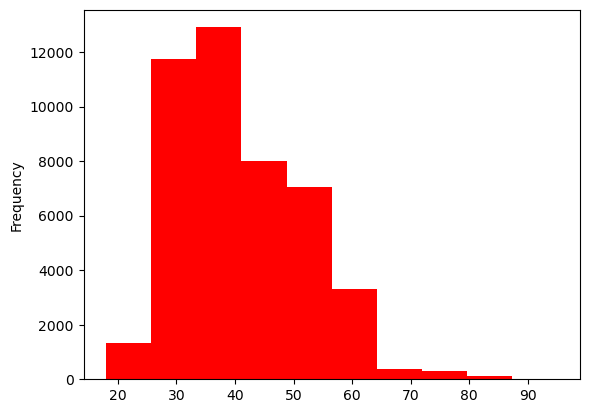

In [52]:
# ploting the histogram for the age columns

data1.age.plot.hist(color='r')
plt.show()

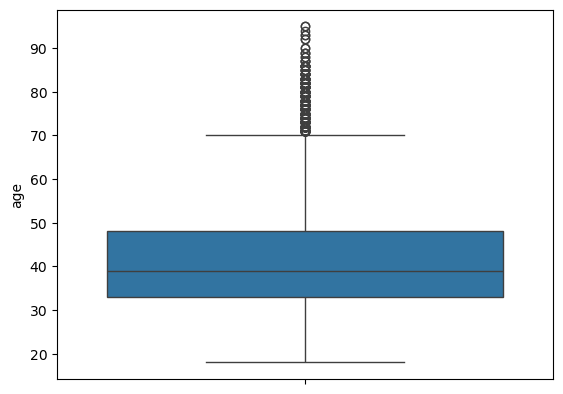

In [53]:
sns.boxplot(data1.age)
plt.show()

### Salary Column

In [55]:
data1.salary.describe()

count     45161.000000
mean      57004.849317
std       32087.698810
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

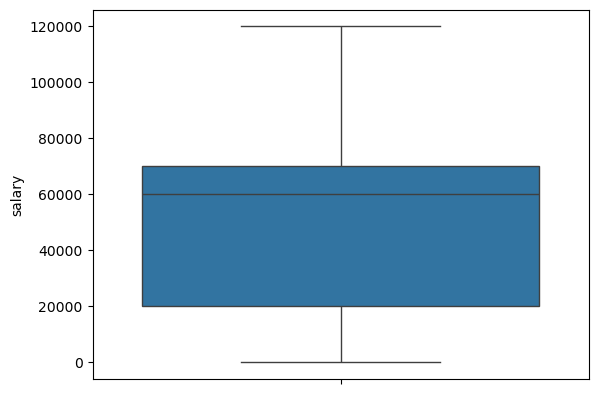

In [56]:
sns.boxplot(data1.salary)
plt.show()

### Balance column

In [58]:
data1.balance.describe()

count     45161.000000
mean       1362.850690
std        3045.939589
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

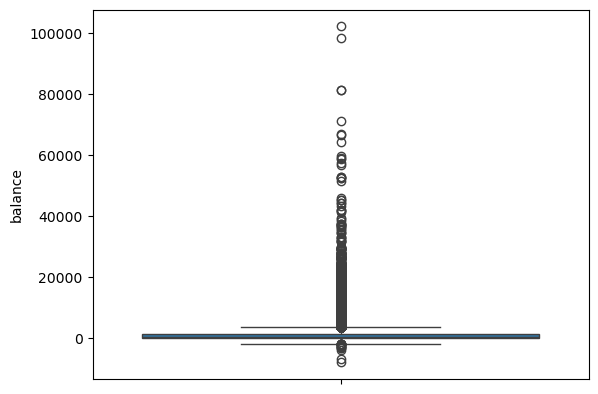

In [59]:
sns.boxplot(data1.balance)
plt.show()

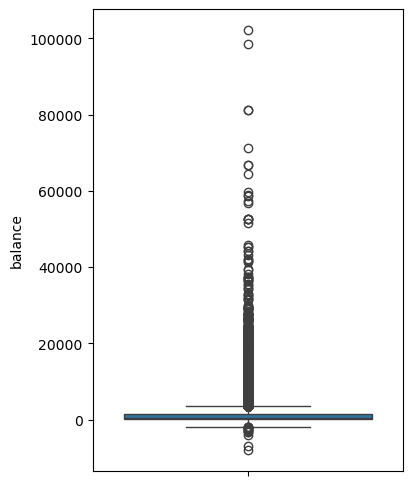

In [60]:
# increse the size of the graph

plt.figure(figsize=[4,6])
sns.boxplot(data1.balance)
plt.show()

In [61]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance column

data1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3576.0
0.95     5769.0
0.99    13173.4
Name: balance, dtype: float64

In [62]:
#describe the data1 dataset for balance variable to be greater than 15000 in data1.

data1[data1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

### Duration column

In [66]:
data1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [67]:
data1.duration.value_counts()

duration
1.5 min                 138
1.68333333333333 min    129
2.06666666666667 min    129
1.73333333333333 min    127
2.03333333333333 min    127
                       ... 
1500 sec                  1
22.1666666666667 min      1
868 sec                   1
1269 sec                  1
16.2833333333333 min      1
Name: count, Length: 2646, dtype: int64

In [68]:
# convert the duration column into single unite i.e minutes and remove the sec or min postfix

data1.duration=data1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))
data.duration.describe()

count       45211
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

# upside code is all correct but output is wrong
it should be in this form

-count    45161.000000

-mean         4.302774

-std          4.293129

-min          0.000000

-25%          1.716667

-50%          3.000000

-75%          5.316667

-max         81.966667

-Name: duration, dtype: float64

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


In [73]:
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


# marital column

In [75]:
data1.marital.value_counts()

marital
married     27185
single      12778
divorced     5198
Name: count, dtype: int64

<Axes: ylabel='marital'>

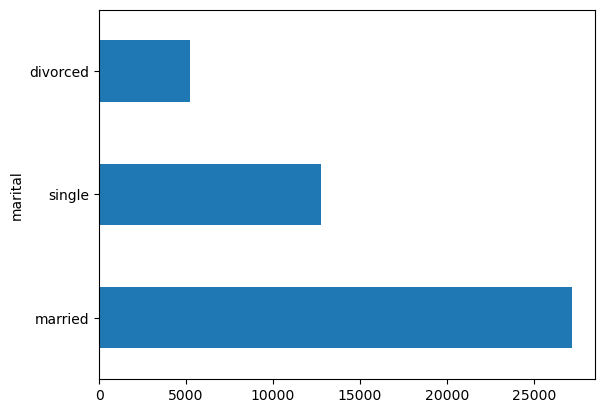

In [76]:
data1.marital.value_counts().plot.barh()

## Job Column

In [78]:
data1.Job.value_counts()

Job
blue-collar      9722
management       9451
technician       7589
admin.           5165
services         4148
retired          2262
self-employed    1574
entrepreneur     1484
unemployed       1302
housemaid        1238
student           938
unknown           288
Name: count, dtype: int64

<Axes: xlabel='Job'>

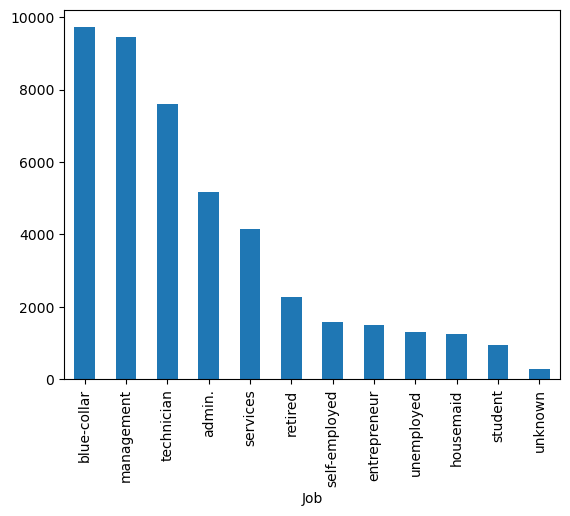

In [79]:
data1.Job.value_counts().plot.bar()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

# Education Column

In [83]:
data1.education.value_counts()

education
secondary    23180
tertiary     13286
primary       6839
unknown       1856
Name: count, dtype: int64

<Axes: ylabel='count'>

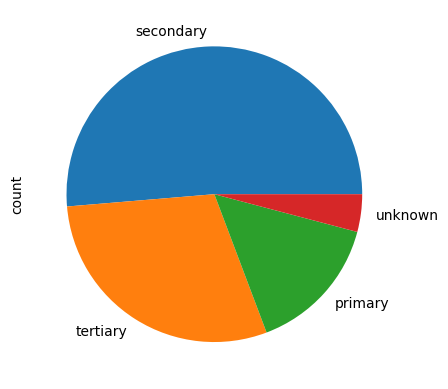

In [84]:
data1.education.value_counts().plot.pie()

In [85]:
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


# poutcome column

In [87]:
data1.poutcome.value_counts()

poutcome
unknown    36920
failure     4894
other       1839
success     1508
Name: count, dtype: int64

<Axes: xlabel='poutcome'>

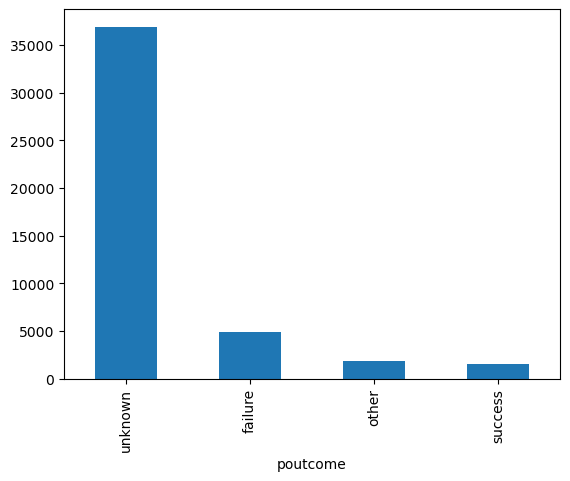

In [88]:
data1.poutcome.value_counts().plot.bar()

In [89]:
# don't remvoe temperaty removeing
# Remove the unknown and see the graph how it will look

data1[-(data1.poutcome=='unknown')].poutcome.value_counts()

poutcome
failure    4894
other      1839
success    1508
Name: count, dtype: int64

<Axes: ylabel='poutcome'>

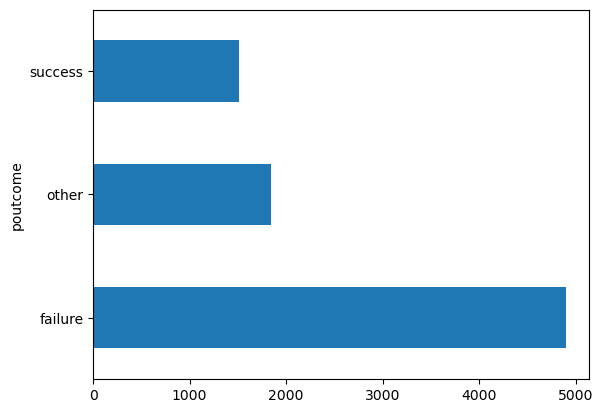

In [90]:
data1[-(data1.poutcome=='unknown')].poutcome.value_counts().plot.barh()

In [91]:
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


# response Column

In [93]:
data1.response.value_counts()

response
no     39876
yes     5285
Name: count, dtype: int64

<Axes: ylabel='count'>

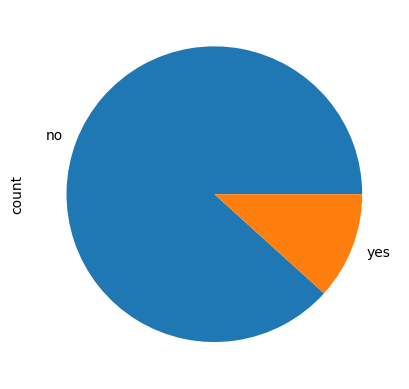

In [94]:
data1.response.value_counts().plot.pie()

# Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

In [98]:
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown


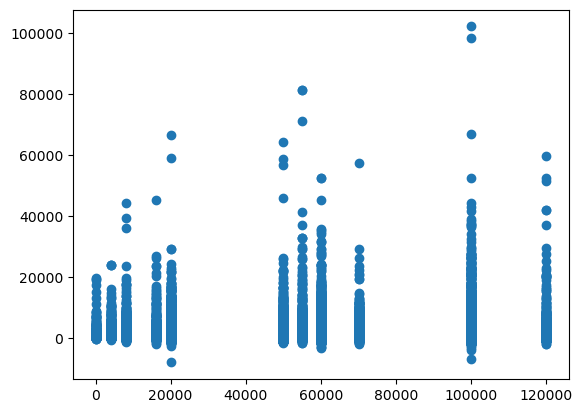

In [99]:
# plot the scatter plot of balace and salary column in data1

plt.scatter(data1.salary, data1.balance)
plt.show()

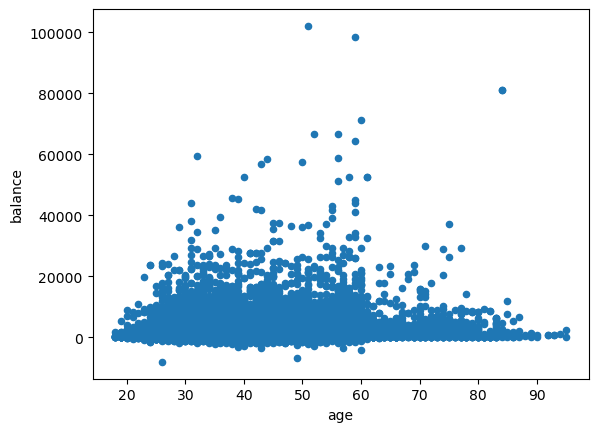

In [100]:
data1.plot.scatter(x='age',y='balance')
plt.show()

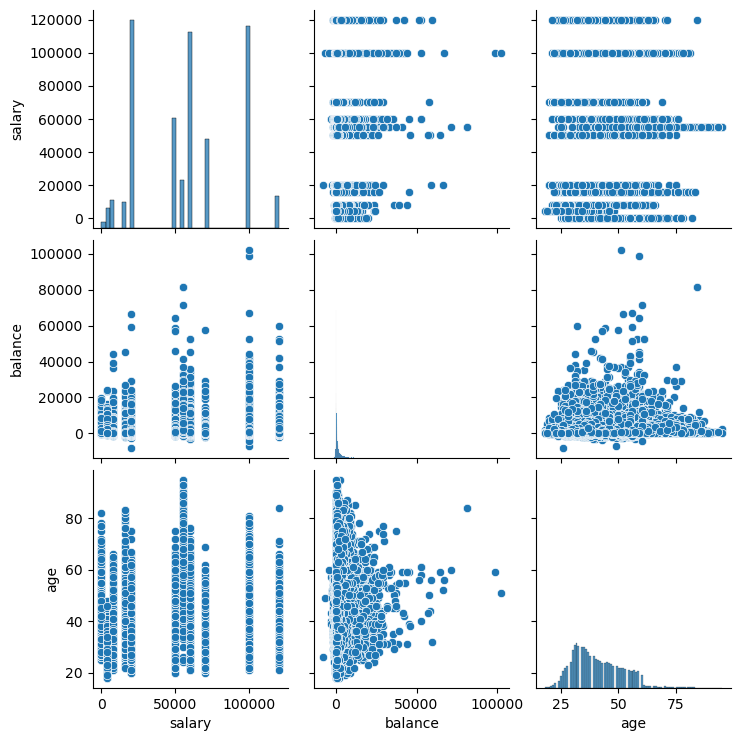

In [101]:
# plot the pairplot of balance salary and age in data1

sns.pairplot(data=data1,vars=['salary','balance','age'])
plt.show()

# Correlation heat map

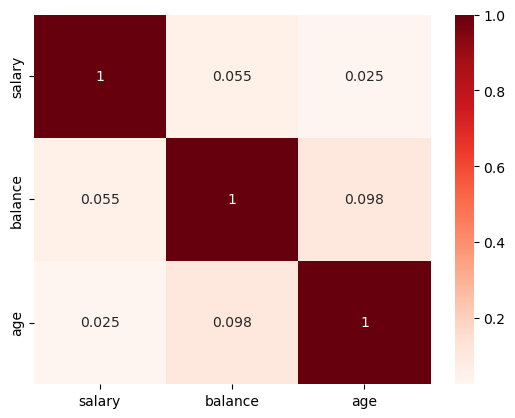

In [103]:
sns.heatmap(data1[['salary','balance','age']].corr(),annot=True,cmap='Reds')
plt.show()

# Segment- 4, Numerical categorical variable

# Salary vs response

In [106]:
data1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [107]:
data1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

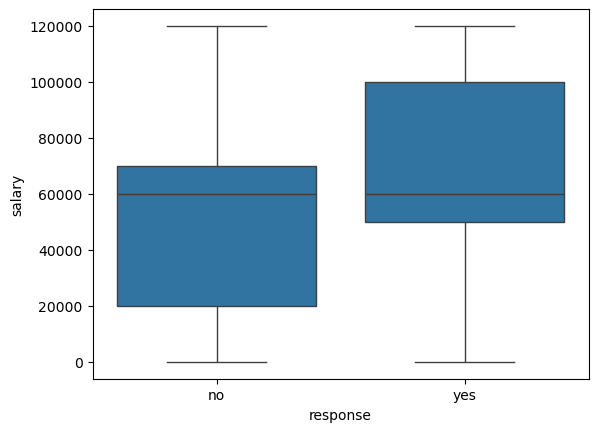

In [301]:
sns.boxplot(data=data1, x='response', y='salary')
plt.show()

# Balance vs response

<Axes: xlabel='response', ylabel='balance'>

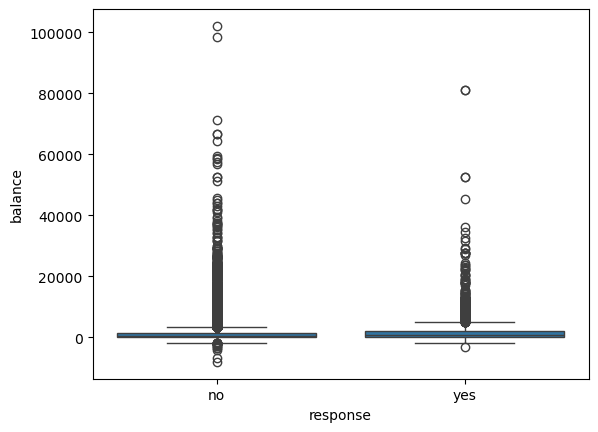

In [110]:
sns.boxplot(data=data1,x='response',y='balance')

In [111]:
data1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

### 75 percentile

In [113]:
def p75(x):
    return np.quantile(x, 0.75)

In [114]:
data1.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.292281,417.0,1345.0
yes,1804.681362,733.0,2159.0


<Axes: xlabel='response'>

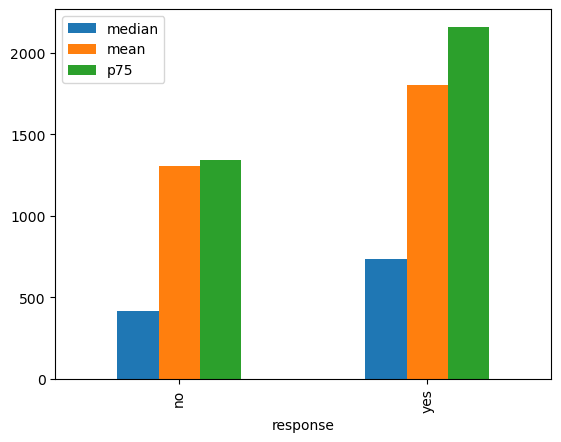

In [115]:
data1.groupby('response')['balance'].aggregate(['median','mean',p75]).plot.bar()

# education vs salary

In [117]:
data1.groupby('education')['salary'].mean()

education
primary      34232.343910
secondary    49731.449525
tertiary     82880.249887
unknown      46529.633621
Name: salary, dtype: float64

In [192]:
data1.groupby('education')['salary'].median()

education
primary       20000.0
secondary     55000.0
tertiary     100000.0
unknown       50000.0
Name: salary, dtype: float64

## Job vs Salary

In [197]:
data1.groupby('Job')['salary'].mean()

Job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

In [199]:
data1.groupby('Job')['salary'].median()

Job
admin.            50000.0
blue-collar       20000.0
entrepreneur     120000.0
housemaid         16000.0
management       100000.0
retired           55000.0
self-employed     60000.0
services          70000.0
student            4000.0
technician        60000.0
unemployed         8000.0
unknown               0.0
Name: salary, dtype: float64

# Segment- 5, Categorical categorical variable 

In [202]:
# create new col and response convert it to yes=1 and no=0

data1['response_flag']=np.where(data1.response=='yes',1,0)
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,Job,education,response_flag
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",4.350000,1,NaN,0,unknown,no,management,tertiary,0
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",2.516667,1,NaN,0,unknown,no,technician,secondary,0
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",3.300000,1,NaN,0,unknown,no,unknown,unknown,0


In [204]:
data1.response_flag.value_counts()

response_flag
0    39876
1     5285
Name: count, dtype: int64

In [206]:
data1.response_flag.mean()

0.1170257523084077

## Education vs response flag

In [305]:
data1.groupby('education')['response_flag'].mean()

education
primary      0.086416
secondary    0.105608
tertiary     0.150083
unknown      0.135776
Name: response_flag, dtype: float64

## Marital vs response flag

In [216]:
data1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119469
married     0.101269
single      0.149554
Name: response_flag, dtype: float64

<Axes: ylabel='marital'>

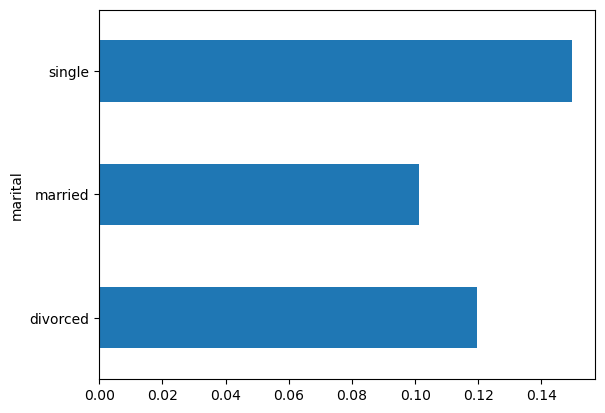

In [220]:
data1.groupby('marital')['response_flag'].mean().plot.barh()

## Loan vs response flag

<Axes: xlabel='loan'>

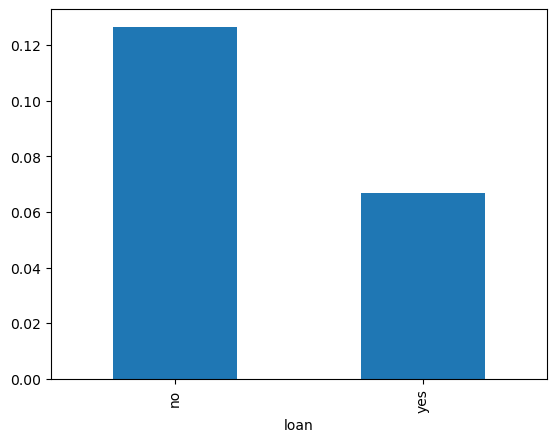

In [225]:
data1.groupby('loan')['response_flag'].mean().plot.bar()

## Housing loans vs response flag

<Axes: xlabel='housing'>

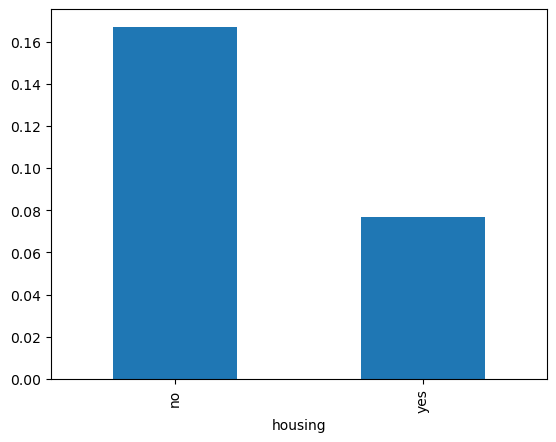

In [231]:
data1.groupby('housing')['response_flag'].mean().plot.bar()

# Age vs response

<Axes: xlabel='response', ylabel='age'>

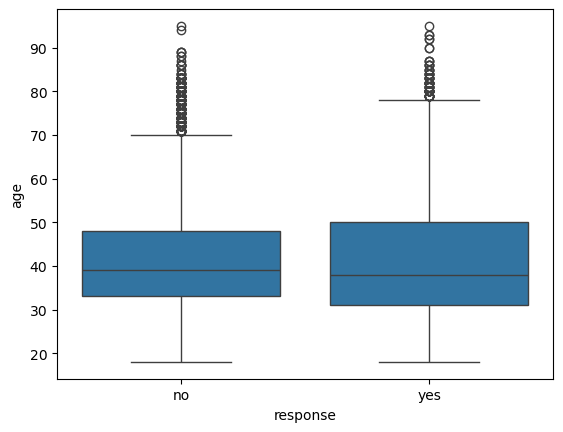

In [237]:
sns.boxplot(data=data1, x='response',y='age')

## making buckets from column age

In [244]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.

pd.cut(data1.age[:5],[0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [246]:
data1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [250]:
data1['age_grp']=pd.cut(data1.age[:5],[0,30,40,50,60,999], labels=['<30','30-40','40-50','50-60','60+'])
data1.age_grp.value_counts(normalize=True)


age_grp
30-40    0.4
40-50    0.4
50-60    0.2
<30      0.0
60+      0.0
Name: proportion, dtype: float64

In [307]:
data1.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,response,Job,education,response_flag,age_grp
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,...,4.350000,1,NaN,0,unknown,no,management,tertiary,0,50-60
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,...,2.516667,1,NaN,0,unknown,no,technician,secondary,0,40-50
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,...,1.266667,1,NaN,0,unknown,no,entrepreneur,secondary,0,30-40
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,...,1.533333,1,NaN,0,unknown,no,blue-collar,unknown,0,40-50
4,33.0,0,1,single,no,no,no,no,unknown,5,...,3.300000,1,NaN,0,unknown,no,unknown,unknown,0,30-40


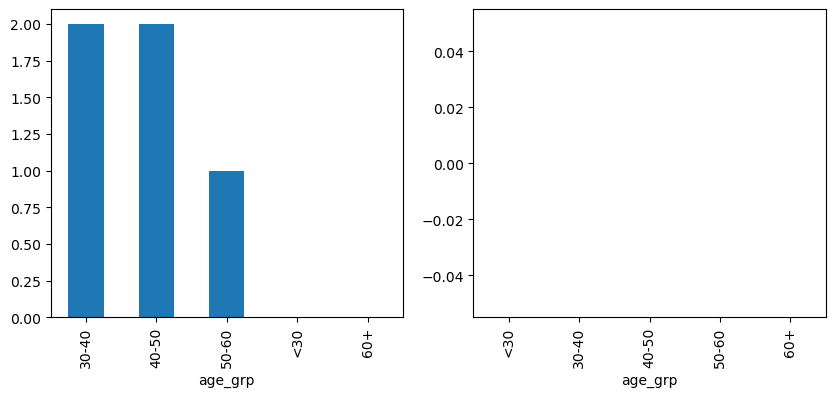

In [315]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
data1.age_grp.value_counts().plot.bar()
plt.subplot(1,2,2)
data1.groupby('age_grp')['response_flag'].mean().plot.bar()
plt.show()

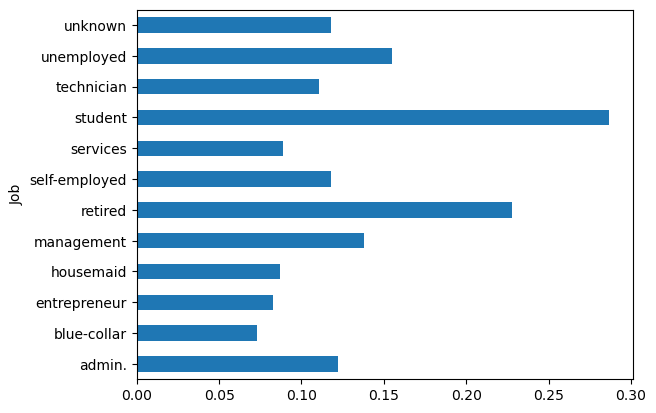

In [258]:
#plot the bar graph of job categories with response_flag mean value. 

data1.groupby('Job')['response_flag'].mean().plot.barh()
plt.show()

# Segment-6, Multivariate analysis 

## Education vs marital vs response 

In [263]:
res=pd.pivot_table(data=data1,index='education', columns='marital', values='response_flag')

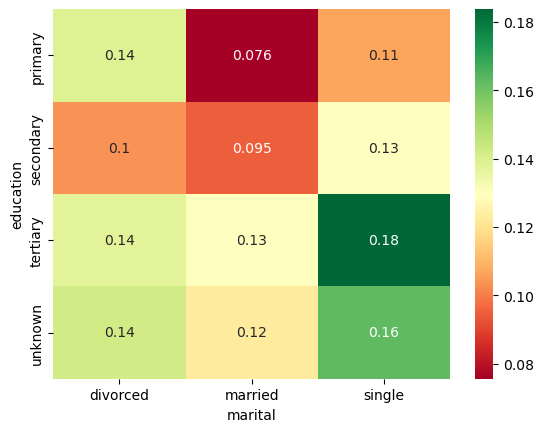

In [269]:
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.show()

<Axes: xlabel='marital', ylabel='education'>

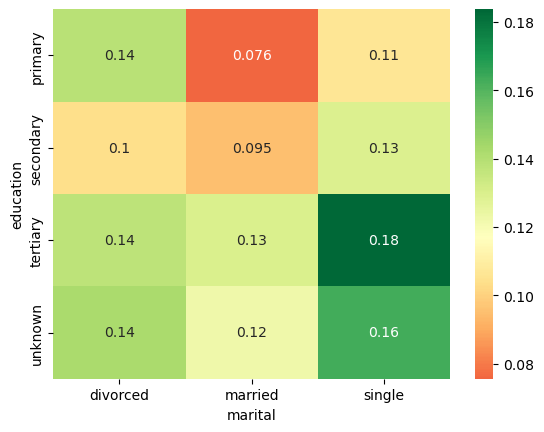

In [271]:
sns.heatmap(res, annot=True, cmap='RdYlGn', center=0.117)

## job vs marital vs response

In [280]:
rs=pd.pivot_table(data=data1, index='Job', columns='marital', values='response_flag')
rs

marital,divorced,married,single
Job,,,
admin.,0.120160,0.113383,0.136153
blue-collar,0.077644,0.062778,0.105760
entrepreneur,0.083799,0.075843,0.113924
housemaid,0.097826,0.072527,0.166667
management,0.127928,0.126228,0.162254
retired,0.283688,0.220682,0.120370
self-employed,0.158273,0.079637,0.191874
services,0.091241,0.074105,0.117696
student,0.166667,0.185185,0.293850


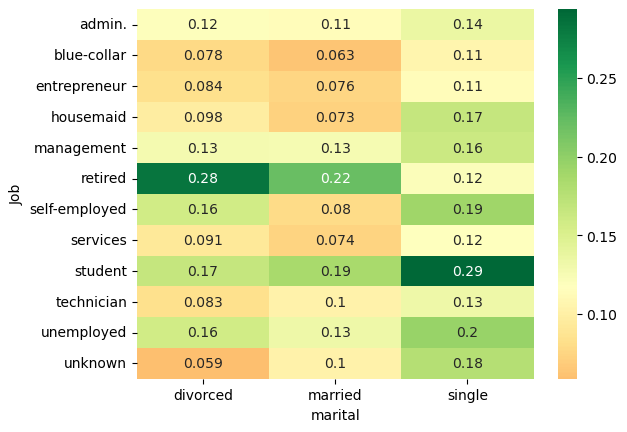

In [288]:
sns.heatmap(rs,annot=True,cmap='RdYlGn',center=0.117)
plt.show()

## education vs poutcome vs response

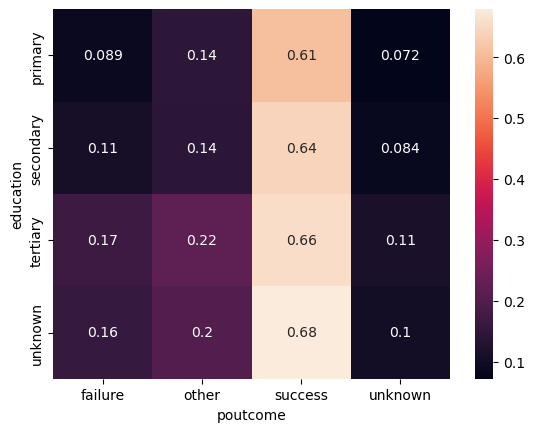

In [293]:
rs=pd.pivot_table(data=data1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(rs, annot=True)
plt.show()

In [295]:
data1[data1['pdays']>0].response_flag.mean()

0.2307785593014795

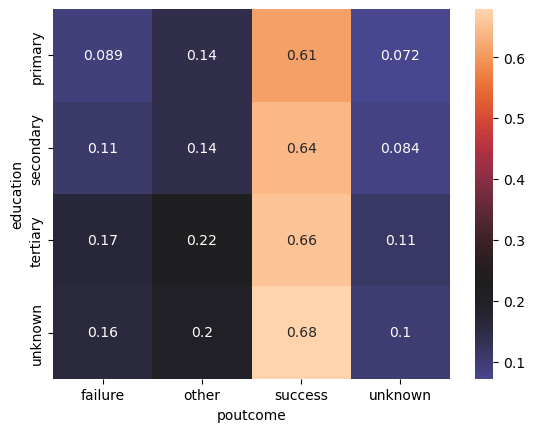

In [299]:
rs=pd.pivot_table(data=data1, index='education', columns='poutcome', values='response_flag')
sns.heatmap(rs, annot=True, center=0.2308)
plt.show()